In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
df = pd.read_csv('cars_data.csv')
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Year  Mileage  Engine Size  Owners  Condition  Price 
0  2018    60000          1.6       1          4   12500
1  2015   120000          2.0       2          3    9000
2  2020    35000          1.4       1          5   15000
3  2017    95000          1.8       3          3    8500
4  2019    50000          2.5       1          4   16000


In [13]:
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['Year', 'Mileage', 'Engine Size', 'Owners', 'Condition', 'Price ']


In [14]:
print("\nDataset Information:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         15 non-null     int64  
 1   Mileage      15 non-null     int64  
 2   Engine Size  15 non-null     float64
 3   Owners       15 non-null     int64  
 4   Condition    15 non-null     int64  
 5   Price        15 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 848.0 bytes
None

Descriptive Statistics:
              Year        Mileage  Engine Size     Owners  Condition  \
count    15.000000      15.000000    15.000000  15.000000  15.000000   
mean   2018.000000   73000.000000     1.846667   1.733333   3.600000   
std       2.507133   43375.437421     0.354293   0.961150   1.121224   
min    2014.000000   10000.000000     1.400000   1.000000   2.000000   
25%    2016.000000   37500.000000     1.600000   1.000000   3.000000   
50%    2018.000000   70

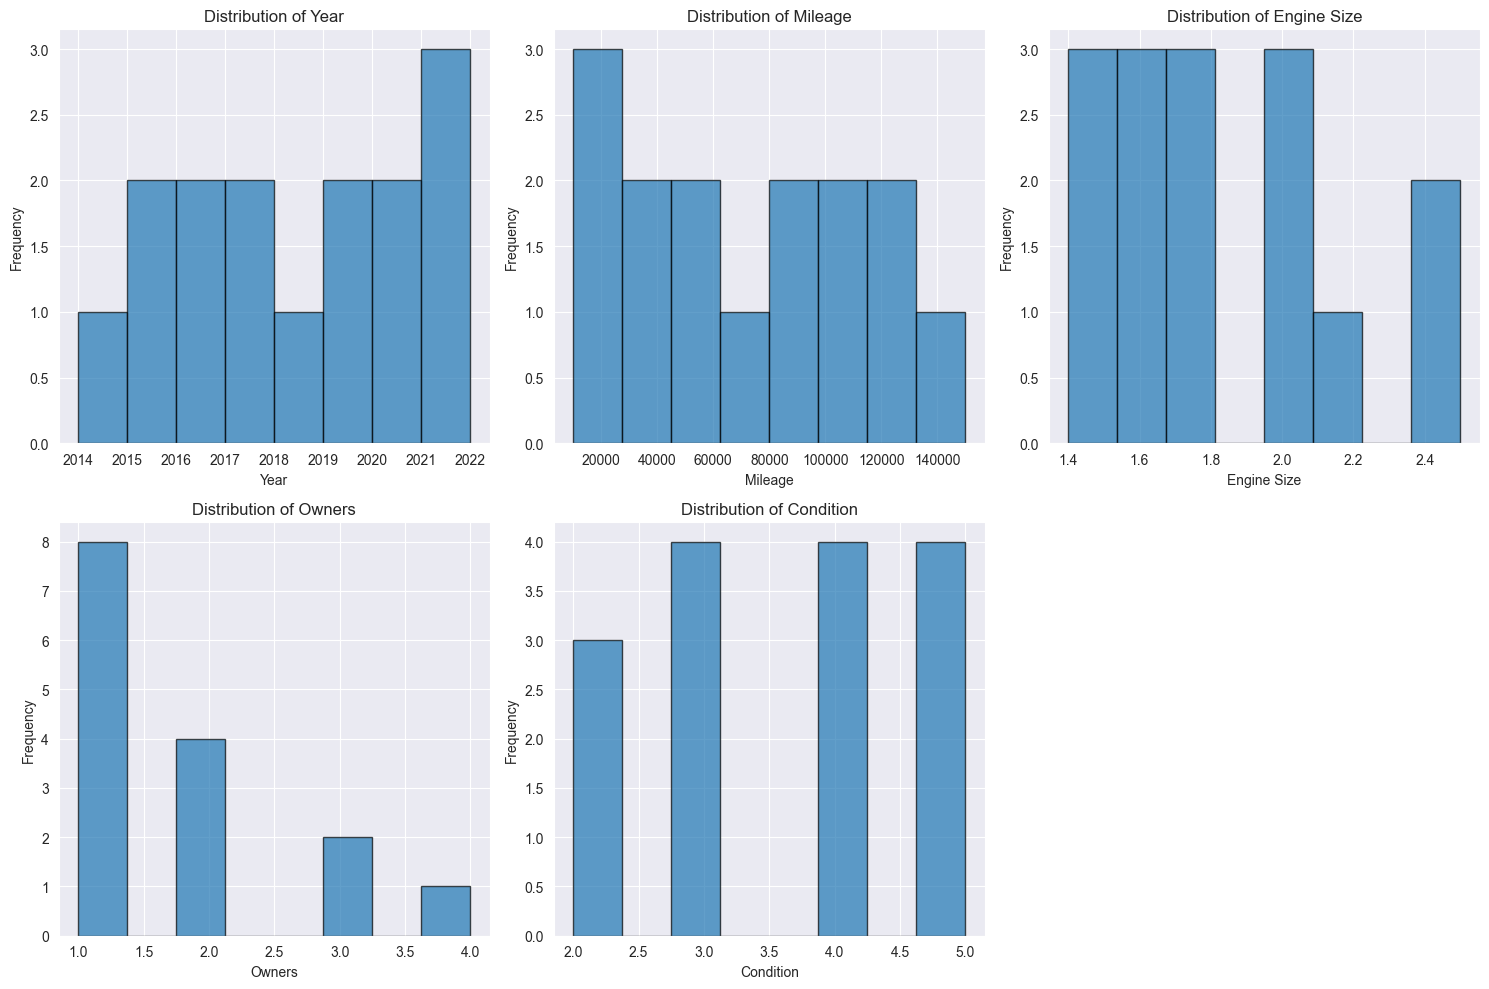

In [15]:
plt.figure(figsize=(15, 10))
features = ['Year', 'Mileage', 'Engine Size', 'Owners', 'Condition']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[feature], bins=8, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Price')

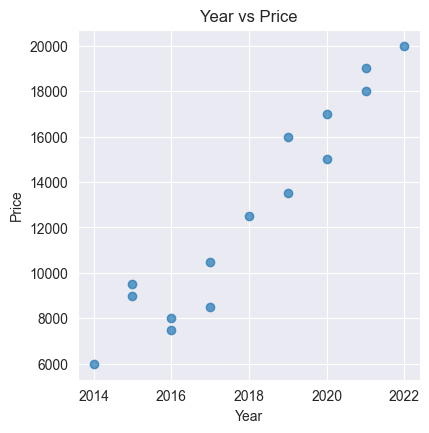

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(df['Year'], df['Price '], alpha=0.7)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

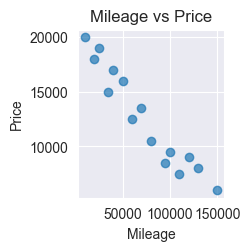

In [17]:
plt.subplot(2, 3, 2)
plt.scatter(df['Mileage'], df['Price '], alpha=0.7)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

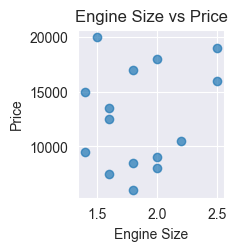

In [18]:
plt.subplot(2, 3, 3)
plt.scatter(df['Engine Size'], df['Price '], alpha=0.7)
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

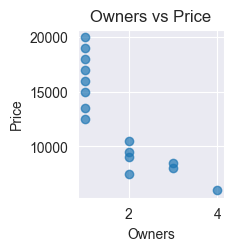

In [19]:
plt.subplot(2, 3, 4)
plt.scatter(df['Owners'], df['Price '], alpha=0.7)
plt.title('Owners vs Price')
plt.xlabel('Owners')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

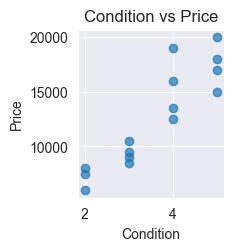

In [20]:
plt.subplot(2, 3, 5)
plt.scatter(df['Condition'], df['Price '], alpha=0.7)
plt.title('Condition vs Price')
plt.xlabel('Condition')
plt.ylabel('Price')

In [21]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [22]:
X = df[['Year', 'Mileage', 'Engine Size', 'Owners', 'Condition']]
y = df['Price ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 12
Test set size: 3


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel trained successfully!")
print(f"Intercept: {model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.2f}")


Model trained successfully!
Intercept: -678444.75
Coefficients:
  Year: 341.70
  Mileage: -0.06
  Engine Size: 1917.34
  Owners: -300.24
  Condition: 811.09


In [24]:
y_pred = model.predict(X_test)

print("\nPredictions on test set:")
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred.round(2)
})
print(comparison_df)


Predictions on test set:
   Actual Price  Predicted Price
0         10500         12181.64
1          8000          7448.08
2         12500         13643.09


In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 1479727.09
R² Score: 0.5634


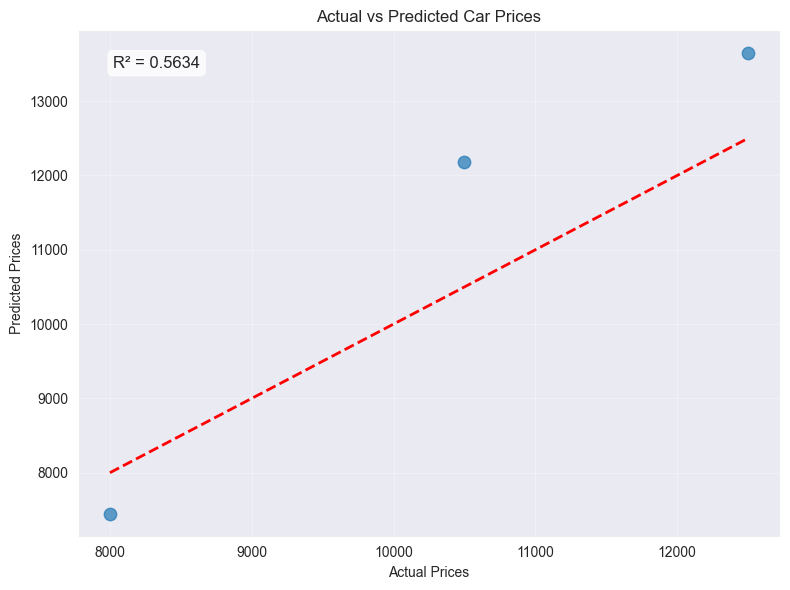

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.grid(True, alpha=0.3)

plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()